In [34]:
import sys, os, re, gzip, json, pickle, shutil, random, joblib

import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_path = '../data'

user_tag_path = data_path + "/user_tweets_tagged.pkl"
user_clean_path = data_path + "/user_tweets_clean.pkl"
troll_tag_path = data_path + "/troll_tweets_tagged.pkl"
troll_clean_path = data_path + "/troll_tweets_clean.pkl"

In [3]:
def getDataFromPickle(path):
    f = open(path, 'rb')
    return pickle.load(f)

In [4]:
user_tag_list = getDataFromPickle(user_tag_path)
user_clean_list = getDataFromPickle(user_clean_path)
troll_tag_list = getDataFromPickle(troll_tag_path)
troll_clean_list = getDataFromPickle(troll_clean_path)

In [5]:
combine = user_tag_list[:500000] + troll_tag_list[:5000000]

In [7]:
random.shuffle(combine)
y = [0 if f.startswith('NormalUser') else 1 for f in combine]

In [9]:
with gzip.open('../data/1000000_features_x.pkl.gz', 'wb') as oz:
    pickle.dump(combine, oz)
    
with gzip.open('../data/1000000_features_y.pkl', 'wb') as o:
    pickle.dump(y, o)

In [11]:
texts = [f.split("\t")[1] for f in combine]

In [12]:
combine=user_tag_list=user_clean_list=troll_tag_list=troll_clean_list=None

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000, stop_words="english")

tfidf = tfidf_vectorizer.fit_transform(texts)

joblib.dump(tfidf, '1000000_tfidf_lemmas.joblib') 

['1000000_tfidf_lemmas.joblib']

In [14]:
x_tfidf_train = tfidf[:-10000,:]
y_tfidf_train = np.array(y[:-10000])
x_tfidf_test = tfidf[-10000:,:]
y_tfidf_test = np.array(y[-10000:])

In [19]:
svm = LinearSVC(dual = False)
svm.fit(x_tfidf_train, y_tfidf_train)
print(svm.score(x_tfidf_test, y_tfidf_test))  

0.9317


In [28]:
predicted = cross_val_predict(svm, x_tfidf_test, y_tfidf_test, cv=2)

In [30]:
print(classification_report(y_tfidf_test, predicted, target_names=['NormalUser', 'TrollUser']))

              precision    recall  f1-score   support

  Basic User       0.69      0.26      0.38      1429
       Troll       0.89      0.98      0.93      8571

    accuracy                           0.88     10000
   macro avg       0.79      0.62      0.65     10000
weighted avg       0.86      0.88      0.85     10000



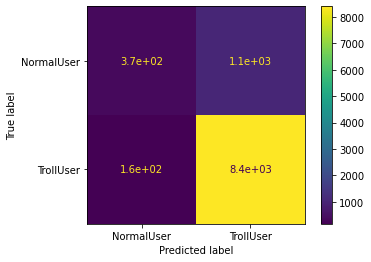

In [35]:
cm = confusion_matrix(y_tfidf_test, predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NormalUser', 'TrollUser'])
cmd.plot()

In [36]:
feature_names = tfidf_vectorizer.get_feature_names() 
coefs_with_fns = sorted(zip(svm.coef_[0], feature_names)) 
df = pd.DataFrame(coefs_with_fns)
df.columns='coefficient','word'
df.sort_values(by='coefficient')

,coefficient,word
0,-4.430062,nctimes
1,-4.128822,10news
2,-4.074323,com
3,-4.009617,corzine
4,-4.000654,h1n1
...,...,...
49995,5.458513,todolistbeforechristmas
49996,5.525509,blacklivesmatter
49997,5.827339,pjnet
49998,5.857754,2017


In [41]:
print(df.head(20))

    coefficient                word
0     -4.430062             nctimes
1     -4.128822              10news
2     -4.074323                 com
3     -4.009617             corzine
4     -4.000654                h1n1
5     -3.964266              stupak
6     -3.835097                 hcr
7     -3.753441             olemiss
8     -3.578164                awsr
9     -3.532251        youraudiofix
10    -3.515487                cnen
11    -3.464167               cagop
12    -3.454993             tisdale
13    -3.436465              shjobs
14    -3.395425        worldcupdraw
15    -3.381207  youmightbealiberal
16    -3.294640                2009
17    -3.274773                noh8
18    -3.247141              lastfm
19    -3.211359      businessonline


In [42]:
print(df.tail(20))

       coefficient                         word
49980     4.663398                  1000network
49981     4.665743                 toavoidworki
49982     4.703470                 mustbebanned
49983     4.725776                        emoji
49984     4.749246                     staywoke
49985     4.772114                 podernfamily
49986     4.965885                   newsonenow
49987     4.985357                        trump
49988     5.015020  survivalguidetothanksgiving
49989     5.054475              realdonaldtrump
49990     5.109617          thingsyoucantignore
49991     5.166422                 blacktwitter
49992     5.248803                         maga
49993     5.337272                         topl
49994     5.456258            igetdepressedwhen
49995     5.458513      todolistbeforechristmas
49996     5.525509             blacklivesmatter
49997     5.827339                        pjnet
49998     5.857754                         2017
49999     6.179125                      